# Métodos supervisionados
> 1. Naïve Bayes
> 2. Redes Bayesianas
> 3. Árvores de Decisão
## Métricas para classificadores
> 1. Acurácia, Precisão, Recall e F1-Score
> 2. Matriz de confusão
> 3. Curva ROC

In [213]:
!pip install -U -q PyDrive
!pip install -U matplotlib

import pandas as pd
from datetime import datetime
import csv
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats


import numpy as np

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials
from os.path import exists as file_exists


# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
googleDrive = GoogleDrive(gauth)


drive.mount('/content/gdrive')

#leitura do arquivo
!ls "/content/gdrive/MyDrive/Colab Notebooks/"
file = '/content/gdrive/MyDrive/Colab Notebooks/files/1.csv'

file2 = '/content/gdrive/MyDrive/Colab Notebooks/files/accelerometer-1591009614.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
 CdiasExercicio2.ipynb	   Lista3-2.ipynb
 estatistica		   lista3.ipynb
 Exercicio2-parte2.ipynb   medidas_estatisticas.ipynb
 Exercicios-2.ipynb	   palavras.txt
 files			   parrot.ipynb
 IA-LAB1		  'Política e COVID.ipynb'
 ImagemCloud.ipynb	  'Política e COVID_NOVO.ipynb'
 Lista1-IA.ipynb	   SupervisedLearning.ipynb
 lista1.ipynb		   tempoxclasse.ipynb
 lista2.ipynb


> Conjunto de dados (https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset)

In [214]:
url = file
df = pd.read_csv(url)
df

,indice,x,y,z,movimento
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1
...,...,...,...,...,...
111745,130250.0,1903,2385,1995,7
111746,130250.0,1899,2384,1990,7
111747,130260.0,1909,2384,1992,7
111748,130260.0,1902,2388,1989,7


In [252]:
valuesDf = df.drop(columns=['indice', 'movimento'], axis=1)
valuesDf.describe()

,x,y,z
count,111750.000000,111750.000000,111750.000000
mean,0.604781,2379.689315,2046.234577
std,0.796395,37.594662,62.292015
min,0.002612,1697.000000,994.000000
25%,0.238016,2374.000000,1993.000000
50%,0.483868,2380.000000,2023.000000
75%,0.779429,2386.000000,2113.000000
max,24.547839,2713.000000,2739.000000


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111750 entries, 0 to 111749
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   indice     111750 non-null  float64
 1   x          111750 non-null  float64
 2   y          111750 non-null  int64  
 3   z          111750 non-null  int64  
 4   movimento  111750 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 4.3 MB


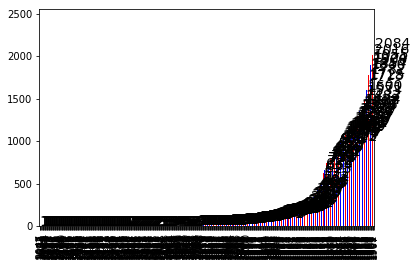

In [217]:
# Característica do conjunto original
ax = df['x'].value_counts(ascending=True).plot(kind='bar', color=['r','b']);
#inserir legendas acima das barras
for p in ax.patches:
  ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=14)

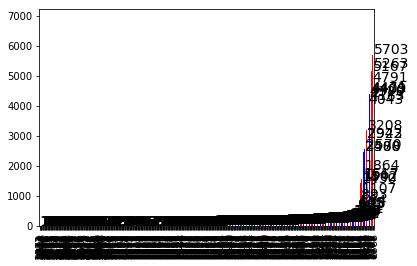

In [248]:
# Característica do conjunto original
ay = df['y'].value_counts(ascending=True).plot(kind='bar', color=['r','b']);
#inserir legendas acima das barras
for p in ay.patches:
  ay.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=14)

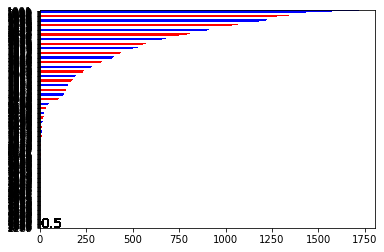

In [250]:
# Característica do conjunto original
az = df['z'].value_counts(ascending=True).plot(kind='bar', color=['r','b']);
#inserir legendas acima das barras
for p in az.patches:
  az.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005),fontsize=14)

## Divisão do conjunto de dados
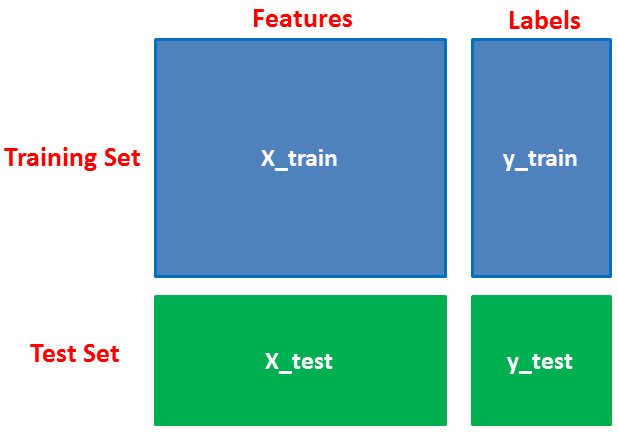


In [218]:

X = df[['x', 'y', 'z']]
y = df['movimento']

# usually:
#X = fruits.iloc[:,:-1]
#y = fruits.iloc[:,-1]

print(X.shape)
print(y.shape)



(111750, 3)
(111750,)


In [258]:
print('Quantidade de Movimentos: ', df.movimento.unique())

print(np.bincount(y))
print(df.movimento.value_counts())
#see seaborn chart

print('\n# Qtde. movimento 1 = '+str(len(df.loc[df['movimento'] == 1])))

Quantidade de Movimentos:  [1 2 3 4 5 6 7]
[    0 33677   928  7901 12649  3191  2917 50487]
7    50487
1    33677
4    12649
3     7901
5     3191
6     2917
2      928
Name: movimento, dtype: int64

# Qtde. movimento 1 = 33677


In [220]:
from sklearn.model_selection import train_test_split
# Divisão do conjunto de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#verificar dimensões dos subconjuntos
X_train.shape, X_test.shape, y_train.shape, y_test.shape



((78225, 3), (33525, 3), (78225,), (33525,))

In [221]:
from sklearn.neighbors import KNeighborsClassifier

In [222]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [223]:
print("KNN accuracy on test set: ", knn.score(X_test, y_test))


KNN accuracy on test set:  0.8540790454884415


# Validação Cruzada, Matriz de Confusão e Gráficos
**VALIDAÇÃO CRUZADA**


In [224]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(knn, X, y, cv=10)
print('Cross-validation score with 10 folds:', cv_scores)
print('Mean cross-validation score with 10 folds: {:.3f}'.format(np.mean(cv_scores)))


Cross-validation score with 10 folds: [0.60286353 0.83239374 0.889217   0.84411633 0.84912752 0.85243848
 0.86791946 0.84706935 0.85807606 0.77494407]
Mean cross-validation score with 10 folds: 0.822


**MATRIZ DE CONFUSÃO**

In [225]:
#from sklearn.metrics import confusion_matrix
#confusion = confusion_matrix(y, knn.predict(X))
#confusion
pd.crosstab(y, knn.predict(X), colnames=['Predita'])

Predita,1,2,3,4,5,6,7
movimento,,,,,,,
1,33016,19,40,331,86,8,177
2,85,217,55,370,43,12,146
3,31,39,4244,460,88,106,2933
4,474,75,355,10248,386,173,938
5,165,22,37,1096,1419,38,414
6,90,21,252,1572,110,467,405
7,216,58,1244,1149,88,92,47640


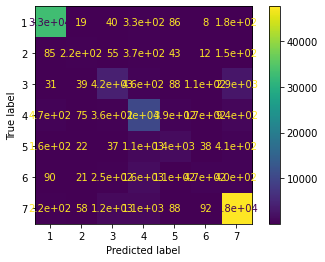

In [226]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X, y)

In [227]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = knn.predict(X_test)
print("Relatório de classificação: \n", classification_report(y_test, y_pred))  

Relatório de classificação: 
               precision    recall  f1-score   support

           1       0.96      0.97      0.97     10094
           2       0.35      0.18      0.24       288
           3       0.63      0.49      0.55      2342
           4       0.64      0.77      0.70      3790
           5       0.56      0.37      0.44       928
           6       0.39      0.13      0.20       865
           7       0.89      0.93      0.91     15218

    accuracy                           0.85     33525
   macro avg       0.63      0.55      0.57     33525
weighted avg       0.84      0.85      0.84     33525



**GRÁFICOS**

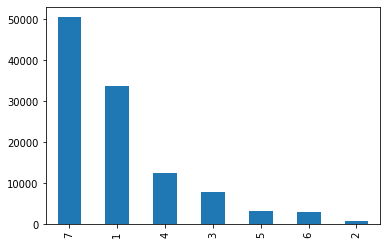

In [228]:
#number of examples in each class 
%matplotlib inline


df.movimento.value_counts().plot(kind='bar')

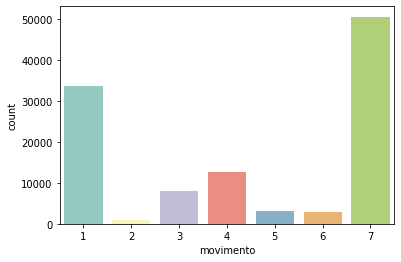

In [229]:
import seaborn as sns
%matplotlib inline
sns.countplot(x=df['movimento'], palette="Set3")
plt.show()

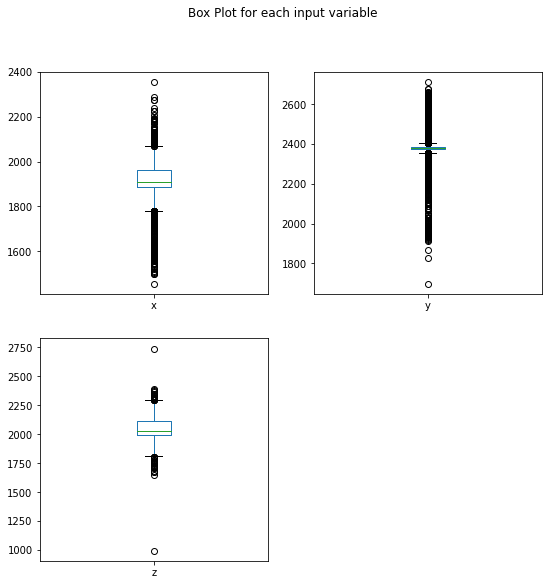

In [230]:
values = df.drop(columns=['indice', 'movimento'], axis=1)
values.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(9,9), title='Box Plot for each input variable')
plt.savefig('coordenadas')
plt.show()

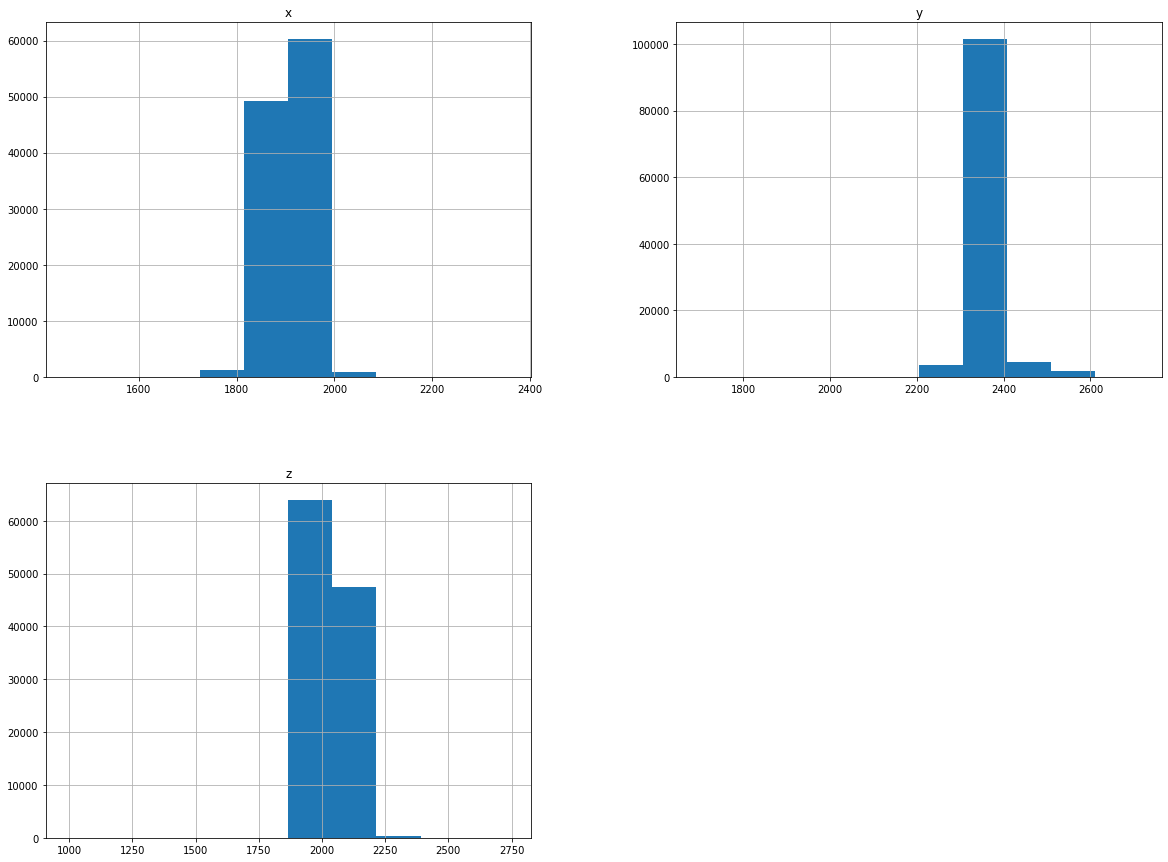

In [231]:
%matplotlib inline
import matplotlib.pyplot as plt
values = df.drop(columns=['indice', 'movimento'], axis=1)
values.hist(column=['x', 'y', 'z'], bins=10, figsize=(20,15))
plt.show()

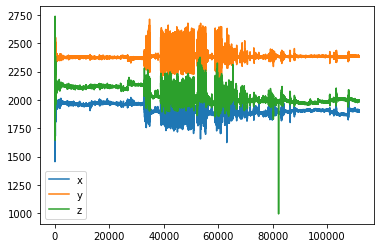

In [232]:
%matplotlib inline
values = df.drop(columns=['indice', 'movimento'], axis=1)
values.plot()



[21.7204599  11.79455379 15.16334617 ...  0.47864368  0.05754463
  0.12292639]
(array([     0,      1,      2, ..., 111747, 111748, 111749]),)


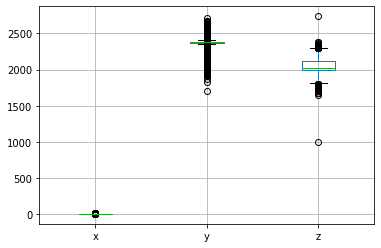

In [244]:
df.boxplot(column=['x','y','z'])

x=np.abs(stats.zscore(df['x']))
print(x)

threshold = 2000
print(np.where(x < threshold))

df.x = x

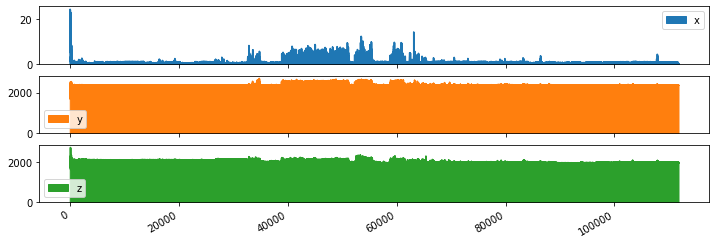

In [245]:
values = df.drop(columns=['indice', 'movimento'], axis=1)
axs = values.plot.area(figsize=(12, 4), subplots=True)

Text(0, 0.5, 'Movimento')

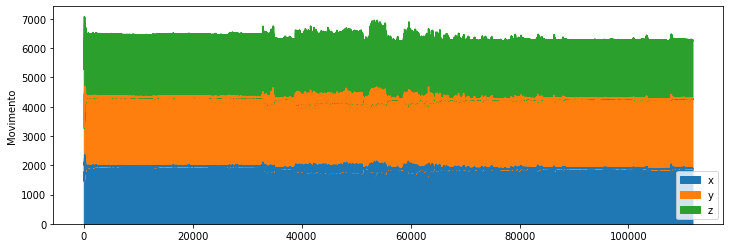

In [235]:
fig, axs = plt.subplots(figsize=(12, 4))
values.plot.area(ax=axs)
axs.set_ylabel("Movimento")
#fig.savefig("movimento.png")

## Naive Bayes
> Detalhes em: https://scikit-learn.org/stable/modules/naive_bayes.html

In [236]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

#Treinar o modelo usando o conjunto de treinamento
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


In [237]:
gnb.priors

## Redes Bayesianas
> * É uma técnica de modelagem gráfica probabilística (PGM) usada para calcular incertezas usando o conceito de probabilidade. 
> * Popularmente conhecidas como Redes de Crença, as Redes Bayesianas são usadas para modelar incertezas usando Gráficos Acíclicos Direcionados (DAG) e distribuição de probabilidades condicionais (CPD).
> * Abordagens:
>> 1. **Aprendizagem de estrutura**: dado um conjunto de amostras de dados, estime um DAG que capture as dependências entre as variáveis.
>>2. **Aprendizagem de parâmetros**: Dado um conjunto de amostras de dados e um DAG que captura as dependências entre as variáveis, estime as distribuições de probabilidade (condicionais) das variáveis individuais.
>>3. **Inferências**: Calcule as probabilidades dadas o CPD e o DAG.

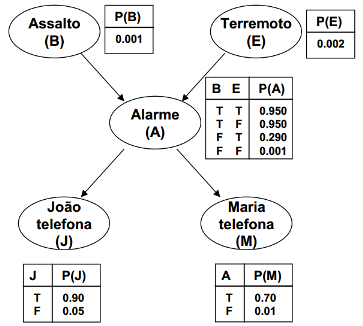

In [238]:
#!pip install -U pgmpy>=0.1.13
#!pip install -U bnlearn # -U is to force to overwrite current version
#!pip install -U matplotlib

In [239]:
# Carregar bibliotecas
import pgmpy # Version pgmpy should be >= 0.1.13
import bnlearn

Exception: ignored

In [ ]:
df_raw = df.copy()

# Pre-processing of the input dataset
dfhot, dfnum = bnlearn.df2onehot(df_raw)

# Structure learning
DAG = bnlearn.structure_learning.fit(dfnum)

# Plot
G = bnlearn.plot(DAG)

In [ ]:
# Parameter learning
model = bnlearn.parameter_learning.fit(DAG, df_raw)

In [ ]:
# Print CPDs
bnlearn.print_CPD(model)

In [ ]:
# Make 1st inference
q_1 = bnlearn.inference.fit(model, variables=['output'], evidence={'slp':0})


In [ ]:
# Make 2st inference
q_2 = bnlearn.inference.fit(model, variables=['output'], evidence={'sex':1, 'thall':0})


## Árvores de Decisão
> https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier


> * Funcionamento do algoritmo
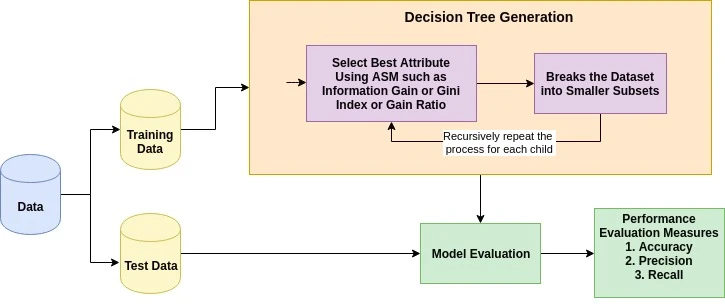

In [ ]:
from sklearn import tree

#modelDT = tree.DecisionTreeClassifier() #critérios default
modelDT = tree.DecisionTreeClassifier(criterion="entropy", min_samples_split=35,max_depth=4)
modelDT = modelDT.fit(X_train, y_train)

In [ ]:
#Pacote necessário para plotar gráfico
!pip install graphviz 
!pip install pydotplus


In [ ]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(modelDT, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('diabetes.png')
Image(graph.create_png())

# Métricas de avaliação para classificadores
> 1. **Acurácia**: percentual de instâncias de teste corretamente classificadas pelo modelo
> 2. **Matriz de Confusão** é construída a partir de:
>> - instâncias positivas que foram corretamente classificadas pelo modelo - Verdadeiros positivos (TP – True Positives);
>> - instâncias negativas que foram corretamente classificadas pelo modelo - Verdadeiros negativos (TN – True Negatives); 
>> - instâncias negativas que foram incorretamente rotuladas como positivas - Falsos positivos (FP – False Positives);
>> - instâncias positivas que foram incorretamente rotuladas como negativas. - Falsos negativos (FN – False Negatives)
> 3. **Precisão**:  dentre todas as classificações de classe Positivo que **o modelo fez**, quantas estão corretas;
> 4. **Recall**: dentre todas as situações de classe Positivo **como valor esperado**, quantas estão corretas; 
> 5. **F1-Score**: média harmônica entre precisão e recall.
> 6. **Curva ROC**
>> - técnica de avaliação utilizada para visualmente comparar a performance de classificadores, sendo particularmente útil em problemas classificação binária cujos domínios apresentam um grande desequilíbrio de classes

## Performance do Naïve Bayes

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

> Acurácia, Precisão, Recall e F1-Score

In [ ]:
#Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(metrics.classification_report(y_test,y_pred))



> Matriz de Confusão

In [ ]:
plot_confusion_matrix(gnb, X_test, y_test)   

> Curva ROC

In [ ]:
#Curva ROC  
metrics.plot_roc_curve(gnb, X_test, y_test) 

## Performance da Árvore de Decisão

> Acurácia, Precisão, Recall e F1-Score

In [ ]:
#Predict the response for test dataset
y_pred = modelDT.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print(metrics.classification_report(y_test,y_pred))

> Matriz de confusão

In [ ]:
plot_confusion_matrix(modelDT, X_test, y_test)  

> Curva ROC

In [ ]:
#Curva ROC  
metrics.plot_roc_curve(modelDT, X_test, y_test) 